# Exploración de datos en Pandas

## Importando datos desde fuentes externas

In [1]:
import pandas as pd

Para poder importar archivos xls necesitaremos instalar una librería adicional para que pandas pueda leer su contenido

In [2]:
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Podrá importar datos desde los formatos más habituales (csv, tsv, excel, html, json, etc.), que se encuentren accesibles en su disco o en la red.

En el siguiente ejemplo se usa el nombre del fichero local...

In [3]:
dataset_location = "titanic3.xls"

... pero puede ser la ruta a una url remota

In [4]:
dataset_location = "https://hbiostat.org/data/repo/titanic3.xls"

Eche un vistazo al contenido del archivo para entender su estructura y https://hbiostat.org/data/repo/ctitanic3 para más detalles.

Para cargar el dataset en un `dataframe`, basta con usar el método correspondiente de la familia `pd.read_*`, y si fuera necesario, adaptar mediante parámetros las opciones de lectura.

In [5]:
df = pd.read_excel(dataset_location)

In [6]:
help(pd.read_excel)

Help on function read_excel in module pandas.io.excel._base:

read_excel(
    io,
    sheet_name: 'str | int | list[IntStrT] | None' = 0,
    *,
    header: 'int | Sequence[int] | None' = 0,
    names: 'SequenceNotStr[Hashable] | range | None' = None,
    index_col: 'int | str | Sequence[int] | None' = None,
    usecols: 'int | str | Sequence[int] | Sequence[str] | Callable[[str], bool] | None' = None,
    dtype: 'DtypeArg | None' = None,
    engine: "Literal['xlrd', 'openpyxl', 'odf', 'pyxlsb', 'calamine'] | None" = None,
    converters: 'dict[str, Callable] | dict[int, Callable] | None' = None,
    true_values: 'Iterable[Hashable] | None' = None,
    false_values: 'Iterable[Hashable] | None' = None,
    skiprows: 'Sequence[int] | int | Callable[[int], object] | None' = None,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    parse_dates: 'list | dict | bool' = False,
    date_parser: '

Echemos un vistazo a las primeras filas del dataframe.

In [7]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Veamos cuáles son las dimensiones del dataframe observando su _forma_ (shape)

In [8]:
df.shape

(1309, 14)

Si lo que se desea es acceder a información concreta, bastará usar a la propiedad o al método correspondiente.

Veamos cuáles son las columnas de las que dispone el dataframe.

In [9]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

## Analizando y recodificando las columnas

Para obtener más información acerca de las columnas, tipos de datos, etc. se dispone del método `info()`

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


Si solo deseamos conocer de qué tipo son los datos almacenados en las columnas, podemos acceder al atributo `dtypes`.

In [11]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

Como puede apreciarse, la columna `sex` está almacenada como un objeto (una cadena de caracteres), y la columna `survived` (si sobrevivió o no) está almacenada como entero. 

Procedamos a cambiarlas como datos categóricos. Para ello puede emplearse el método `astype`.

In [12]:
df.sex = df.sex.astype("category") # empleando el operador '.' para acceder a la colmna
df["survived"] = df["survived"].astype("bool") # empleando el operador "[]" para acceder a la columna

# category mira los valores n que tiene la variable/columna, y crea n categorías

Echemos un vistazo ahora a los tipos de las columnas.

In [13]:
df.dtypes

pclass          int64
survived         bool
name           object
sex          category
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
cabin          object
embarked       object
boat           object
body          float64
home.dest      object
dtype: object

In [14]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


__Ejercicio:__ Convierta la columna `pclass` que indica la clase en la que viajaba cada pasajero en una categoría en lugar de seguir empleandola como entero.

In [15]:
# Escribe tu código aquí
df.pclass = df.pclass.astype("category")


Para analizar los diferentes valores que toma una variable categórica, por ejemplo `embarked`, se puede emplear el método `unique()` de la siguiente forma:

In [16]:
df.embarked.unique()

array(['S', 'C', nan, 'Q'], dtype=object)

Mirando la documentación del dataset del Titanic, se puede leer que la variable `embarked` toma los valores 'C', 'Q' y 'S', que corresponden a los puertos de embarque Cherbourg, Queenstown y Southampton, respectivamente.

Pasemos a recodificar estos valores por su nombre completo para que resulte más significativo.

In [17]:
df.embarked = df.embarked.replace({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
# replace({valor_origen: valor destino})

In [18]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,Southampton,2,NaN,"St Louis, MO"
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


¿De qué tipo tipo de dato de df.embarked?


In [ ]:
df.embarked.dtype.name
# accedemos a la columna (embarked) > tipo > nombre del tipo

'object'

Una vez reemplazadas las cadenas de caracteres por otras más significativas, convirtamos la columna 'embarked' en una categoría.


In [21]:
df.embarked = df.embarked.astype("category")

Fíjese cómo ha cambiado el resultado del método `unique()` tras la recodificación:

In [22]:
df.embarked.unique()


['Southampton', 'Cherbourg', NaN, 'Queenstown']
Categories (3, object): ['Cherbourg', 'Queenstown', 'Southampton']

Para no tener que ir una a una, puede comprobarse qué valores toman **todas las columnas que están codificadas como "Object"**.

Basta un bucle `for` que recorra las columnas del DataFrame que sean de tipo "Object".

Para ello, puede hacerse uso del método `select_dtypes`, que permite seleccionar columnas según su tipo de dato.

In [23]:
for col in df.select_dtypes(include=["object"]).columns:
    print(f"Columna '{col}': {df[col].unique()}")

Columna 'name': ['Allen, Miss. Elisabeth Walton' 'Allison, Master. Hudson Trevor'
 'Allison, Miss. Helen Loraine' ... 'Zakarian, Mr. Mapriededer'
 'Zakarian, Mr. Ortin' 'Zimmerman, Mr. Leo']
Columna 'ticket': [24160 113781 19952 13502 112050 11769 'PC 17609' 'PC 17757' 'PC 17477'
 19877 27042 'PC 17318' 'PC 17558' 11813 13050 11751 111369 'PC 17483'
 13905 11967 'PC 17760' 110564 113784 112277 36928 113783 110489
 'PC 17608' 113505 111427 113054 'PC 17591' 112379 'PC 17610' 16966 113050
 113798 'PC 17476' 'PC 17606' 'PC 17755' 695 113059 113760 19924 17770
 'W.E.P. 5734' 113806 110152 'PC 17594' 112051 13508 110465 5727
 'PC 17756' 11770 113791 'WE/P 5735' 112901 'PC 17599' 113055 113804
 'F.C. 12750' 17474 33638 'PC 17761' 11755 'PC 17485' 'PC 17580' 11767
 36947 'PC 17531' 'PC 17598' '17421' 'PC 17474' '113051' '19950' '113778'
 'PC 17611' '17765' '13568' '13567' '112058' '113803' '111320' '113503'
 '112378' 'PC 17593' '17453' 'PC 17754' '113780' '112053' 'PC 17582'
 'PC 17759' '1176

Atendiendo a lo que albergan las columnas:

- 'name' que tiene el nombre de la persona.
- 'ticket' con el número de billete. 
- 'cabin' con el número de camarote.
- 'boat' con el número de bote salvavidas.
- 'home.dest' con el destino final de la persona.
- 'body' con el número de identificación o del cuerpo en caso de fallecimiento.

Excepto 'body', el resto de las columnas contienen texto libre, por lo que no es aconsejable convertirlas en categorías.

Las demás columnas 'object' pueden convertirse en categorías. Hagámoslo con un bucle.

In [24]:
except_cols = ['name', 'ticket', 'cabin', 'boat', 'home.dest']

for col in df.select_dtypes(include=['object']).columns.difference(except_cols):
    df[col] = df[col].astype('category')

# 'difference' es para no incluir esas

Ya se ha visto que `body` contiene números enteros. Opciones:

- Podría dejarse como entera (¿tendría sentido?), 
- convertirse en categoría (¿tendría sentido?), o 
- convertirse en cadena de caracteres.

In [25]:
df.body = df.body.astype('object') # o bien 'str', o 'category', o 'Int64' (entero que admite NaN)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   category
 1   survived   1309 non-null   bool    
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    object  
 13  home.dest  745 non-null    object  
dtypes: bool(1), category(3), float64(2), int64(2), object(6)
memory usage: 107.9+ KB


¿Y cuánta memoria está usando cada columna en bytes?

Para eso se dispone del método `memory_usage()`, el cual devuelve una Serie con el uso de memoria de cada columna del DataFrame.

Este método recibir el parámetro `deep=True` para obtener una estimación más precisa del uso de memoria, especialmente para columnas de tipo objeto o categórico.

In [27]:
df.memory_usage(deep=True)

Index          132
pclass        1441
survived      1309
name         99655
sex           1525
age          10472
sibsp        10472
parch        10472
ticket       71756
fare         10472
cabin        48006
embarked      1594
boat         50858
body         41888
home.dest    68831
dtype: int64

Para hacernos una primera idea sobre los datos almacenados en el dataframe, el método `describe()` proporciona algo de *"información estadística descriptiva"* que puede resultar útil.

In [ ]:
df.describe()
# aporta info solo para las columnas con datos numéricos

,age,sibsp,parch,fare
count,1046.000000,1309.000000,1309.000000,1308.000000
mean,29.881135,0.498854,0.385027,33.295479
std,14.413500,1.041658,0.865560,51.758668
min,0.166700,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.275000
max,80.000000,8.000000,9.000000,512.329200


Fíjese que no aparecen aquellos datos definidos como categoríass, cadenas de caracteres, etc., sino solo los datos almacenados como numéricos.

__Ejercicio:__ Vuelva a ejecutar las anteriores celdas de este `notebook` pero esta vez sin realizar la conversión a tipo categórico de las columnas.

__Pregunta:__ ¿Qué hubiera ocurrido al no convertir a tipo de dato categórigo la columna `survived`, `pclass`, `sex` o `body`?

In [ ]:
# Habrían aparecido más columnas en el resultado de discribe que no tienen sentido

In [29]:
df.survived.unique()

array([ True, False])

En lugar de haber recodificado `survived` como booleano, podríamos haberlo recodificado como 'No sobrevivió', 'Sobrevivió'.

In [30]:
df.survived.map({False: 'No sobrevivió', True: 'Sobrevivió'}).astype('category')

0          Sobrevivió
1          Sobrevivió
2       No sobrevivió
3       No sobrevivió
4       No sobrevivió
            ...      
1304    No sobrevivió
1305    No sobrevivió
1306    No sobrevivió
1307    No sobrevivió
1308    No sobrevivió
Name: survived, Length: 1309, dtype: category
Categories (2, object): ['No sobrevivió', 'Sobrevivió']

¡Ojo!, esto no modifica el DataFrame original. Hay que asignarlo de nuevo si queremos guardar los cambios:

Aunque también podríamos haber convertido primero a categoría y luego renombrado las categorías:

In [31]:
df.survived = df.survived.astype('category').cat.rename_categories({0: 'No sobrevivió', 1: 'Sobrevivió'})

## Identificación y tratamiento de valores nulos

Los valores nulos se refieren a datos que faltan o no están disponibles en un DataFrame o una Series.

Generalmente se representan mediante `NaN` (Not a Number).

Estos valores representan la ausencia de un valor y pueden causar problemas en operaciones (p.ej. estadísticas), por lo que es necesario identificarlos y manejarlos adecuadamente:

- eliminando las filas/columnas que los contengan
- reemplazándolos: 
    - media en datos numéricos
    - moda en datos categóricos
- asignándoles un valor concreto si la semántica lo permita

In [ ]:
# p.ej. que no tenga un número de cadáver no es malo,
# tal vez es que sobrevivió. 

Para obtener los valores nulos, bastará con invocar:

In [33]:
df.isna()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True


... o bien:

In [34]:
df.isnull() # es un alias de df.isna(), es decir, que el método isnull() invoca internamente a isna()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True


Para identificar las variables, si las hay, que tienen valores nulos e indicar cuántos nulos tiene cada una de ellas, se puede hacer lo siguiente.

In [35]:
df.isna().sum()[df.isna().sum() > 0]

age           263
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Algunas alternativas:

In [ ]:
df.isna().sum()[df.isna().any()]

In [ ]:
df.isna().sum()[lambda x: x > 0]

In [ ]:
df.isna().sum().loc[lambda x: x > 0]

In [ ]:
pd.DataFrame([(col, df[col].isna().sum()) for col in df.columns if df[col].isna().sum() > 0], columns=['Column', 'Missing Values'])

Puede comprobarse cómo las variables `body` y `cabin` tiene 1188 y 1014 valores nulos respectivamente de 1309.

¿Cómo podría eliminarlas?

In [ ]:
df.drop(columns=["body", "cabin"], inplace=True)
# 'drop' elimina las columnas completas
# inplace: hace que se haga dentro del propio dataframe, no hace falta una asignación

# alternativamente: df = df.drop(columns=["body", "cabin"])


Por su parte, `fare` y `embarked` tienen muy pocos valores nulos, por lo que podríamos optar por eliminar las filas que los contengan:

In [ ]:
df.dropna(subset=['fare'], inplace=True)
#'dropna' elimina filas que contengan NA en la columna 'fare'
# alternativamente: df = df.dropna(subset=['fare'])

In [38]:
df.isna().sum()[df.isna().any()]

age          263
embarked       2
boat         822
home.dest    563
dtype: int64

¿Por qué no he eliminado `embarked`?

Como se ha adelantado, en ocasiones podría ser interesante reemplazar los valores nulos de una variable categórica por el valor más frecuente (moda).
A modo de ejemplo, hagámoslo con la columna `embarked`.

In [39]:
most_frequent = df.embarked.mode()[0]
df.embarked = df.embarked.fillna(most_frequent)

Y en el caso de una variable continua (p.ej. `age`) se podrían reemplazar los nulos por la media:

In [ ]:
mean_age = df.age.mean()

# no ejecute la siguiente línea, pues reemplaza todos los nulos por la media global
# df.age = df.age.fillna(mean_age) 

# en su lugar, use esta otra para ver el resultado sin modificar el DataFrame original.
df['age'].fillna(mean_age) 

__Pregunta:__ ¿Es una buena elección hacer estas atribuciones?

In [ ]:
# la edad variaba según la clase en la que viajaban y el sexo (mujeres eran más jóvenes)
# otro tratamiento mejor sería: asignar la media en función de la clase y el sexo

Otra opción para el tratamiento de los valores nulos, es asignándoles un valor concreto que encaje con la semántica de la variable.

A modo de ejemplo, para la columna `boat`, que indica el número de bote salvavidas asignado a cada pasajero, se podría considerar que la ausencia de valor indica que 
el pasajero no fue asignado a ningún bote salvavidas, por lo que podemos rellenar los valores nulos con una cadena de texto como 'Not_assigned'.

In [40]:
df.boat = df.boat.fillna('Not_assigned').astype('category') # podemos convertir a categoría tras rellenar los nulos, o dejarla como objeto.

Algo parecido pasa con home.dest, que tiene muchos nulos y no parece práctico eliminarlos. 

Simplemente, se desconoce el destino del pasajero, por lo que podemos asignarles un valor `Unknown`.

In [41]:
df['home.dest'] = df['home.dest'].fillna('Unknown').astype('category')

__Pregunta:__ ¿Por qué he usado `df['home.dest']` en lugar de `df.home.dest`? ¿Daría igual usar uno u otro?

In [ ]:
# porque lo va a tomar como un atributo (.dest) y no lo es

Veamos cómo queda ahora el resumen de valores nulos:

In [ ]:
df.isna().sum()[df.isna().any()]

# Solo queda la edad, que no he tratado

age    263
dtype: int64

Para la edad, que es una variable numérica, tiene sentido reemplazar los valores nulos por la media de la columna. 

Sin embargo, como veremos más adelante, la edad puede ser diferente según el sexo y la clase en la que viajaba el pasajero, por lo que una opción más adecuada sería calcular la media de edad para cada combinación de sexo y clase, y usar esos valores para rellenar los nulos.

## Agrupando información (`groupby`)

Supongamos que se desea agrupar los pasajeros en grupos según el sexo.

Emplearemos el método `groupby` que crea atendiendo a los diferentes valores que se encuentren en la columna o columas seleccionadas.

In [43]:
df.groupby("sex")

C:\Users\elena\AppData\Local\Temp\ipykernel_18688\125453642.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("sex")


In [ ]:
df.groupby("sex", observed=False)

# añadir 'observed=False' para evitar problemas en el futuro

Este objeto `DataFrameGroupBy` consiste en una lista de tuplas conteniendo pares `(clave, dataframe)` donde:

- _clave_: es un valor único dentro de la columna seleccionada
- _dataframe_: es el dataframe resultante de cada agrupación
    
Veámoslo más claro con algo de código:

In [45]:
grouped_df = df.groupby("sex", observed=False)  # agrupamos por sexo

¿Cuántos grupos se han creado?

In [46]:
grouped_df.ngroups

2

Ahora, para cada grupo, veamos la clave y el dataset con la agrupación.

In [47]:
for key, gr in grouped_df:      # para cada par (clave, dataframe)
    print("Grupo: ", key)       # veamos la clave
    print(gr.info())            # veamos la info. del dataframe

Grupo:  female
<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 0 to 1305
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     466 non-null    category
 1   survived   466 non-null    category
 2   name       466 non-null    object  
 3   sex        466 non-null    category
 4   age        388 non-null    float64 
 5   sibsp      466 non-null    int64   
 6   parch      466 non-null    int64   
 7   ticket     466 non-null    object  
 8   fare       466 non-null    float64 
 9   embarked   466 non-null    category
 10  boat       466 non-null    category
 11  home.dest  466 non-null    category
dtypes: category(6), float64(2), int64(2), object(2)
memory usage: 41.4+ KB
None
Grupo:  male
<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 1 to 1308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     842 non-null    c

Cualquier operación que se aplique sobre el objeto de tipo `DataFrameGroupBy`, se realizará **sobre cada uno de los grupos**. 

Así, podríamos obtener estadística descriptiva por grupo...

In [48]:
grouped_df.describe()

# tenemos el objeto agrupación, sobe el que podemos invocar el método 'describe' que se aplica a cada dataframe por separado

age                                                        sibsp  \
        count       mean        std     min   25%   50%   75%   max  count   
sex                                                                          
female  388.0  28.687071  14.576995  0.1667  19.0  27.0  38.0  76.0  466.0   
male    657.0  30.539701  14.243572  0.3333  21.0  28.0  39.0  80.0  842.0   

                  ... parch        fare                              \
            mean  ...   75%  max  count       mean        std   min   
sex               ...                                                 
female  0.652361  ...   1.0  9.0  466.0  46.198097  63.292599  6.75   
male    0.414489  ...   0.0  9.0  842.0  26.154601  42.486877  0.00   

                                                 
              25%      50%        75%       max  
sex                                              
female  10.504175  23.0000  55.331275  512.3292  
male     7.876050  11.8875  26.550000  512.3292  

[2 rows x 32 columns]

Transpongamos el resultado:

In [49]:
grouped_df.describe().T

# porque la forma anterior es un incómoda de visualizar

sex              female        male
age   count  388.000000  657.000000
      mean    28.687071   30.539701
      std     14.576995   14.243572
      min      0.166700    0.333300
      25%     19.000000   21.000000
      50%     27.000000   28.000000
      75%     38.000000   39.000000
      max     76.000000   80.000000
sibsp count  466.000000  842.000000
      mean     0.652361    0.414489
      std      1.101009    0.998419
      min      0.000000    0.000000
      25%      0.000000    0.000000
      50%      0.000000    0.000000
      75%      1.000000    1.000000
      max      8.000000    8.000000
parch count  466.000000  842.000000
      mean     0.633047    0.248219
      std      1.049579    0.709308
      min      0.000000    0.000000
      25%      0.000000    0.000000
      50%      0.000000    0.000000
      75%      1.000000    0.000000
      max      9.000000    9.000000
fare  count  466.000000  842.000000
      mean    46.198097   26.154601
      std     63.292599   42.486877
      min      6.750000    0.000000
      25%     10.504175    7.876050
      50%     23.000000   11.887500
      75%     55.331275   26.550000
      max    512.329200  512.329200

... o acceder a una de las series (columna) específicas, y aplicar sobre ella la operación pertinente para cada grupo.

In [50]:
grouped_df["age"].describe().T

sex,female,male
count,388.000000,657.000000
mean,28.687071,30.539701
std,14.576995,14.243572
min,0.166700,0.333300
25%,19.000000,21.000000
50%,27.000000,28.000000
75%,38.000000,39.000000
max,76.000000,80.000000


Si lo que se desea es trabajar con un grupo concreto, puede extraerse el `DataFrame` específico para dicho grupo.

In [ ]:
grouped_df.get_group("female")

# me traigo el dataset completo donde todas son mujeres(?)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,home.dest
0,1,Sobrevivió,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,Southampton,2,"St Louis, MO"
2,1,No sobrevivió,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,Southampton,Not_assigned,"Montreal, PQ / Chesterville, ON"
4,1,No sobrevivió,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,Southampton,Not_assigned,"Montreal, PQ / Chesterville, ON"
6,1,Sobrevivió,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,Southampton,10,"Hudson, NY"
8,1,Sobrevivió,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,Southampton,D,"Bayside, Queens, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...
1286,3,Sobrevivió,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,Cherbourg,C,Unknown
1290,3,Sobrevivió,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Southampton,Not_assigned,Unknown
1300,3,Sobrevivió,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,Cherbourg,Not_assigned,Unknown
1304,3,No sobrevivió,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,Cherbourg,Not_assigned,Unknown


Esta aproximación permite aplicar, sobre cada grupo, el método de agregación que deseemos. 

Por ejemplo, supongamos que se desea conocer el número de mujeres y hombres que viajaban por clase.

In [52]:
df.groupby("sex").size()

C:\Users\elena\AppData\Local\Temp\ipykernel_18688\4213776571.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("sex").size()


sex
female    466
male      842
dtype: int64

Y si se desea conocer el número de pasajeros por clase.

In [53]:
df.groupby("pclass").size()

C:\Users\elena\AppData\Local\Temp\ipykernel_18688\2268083516.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pclass").size()


pclass
1    323
2    277
3    708
dtype: int64

Y la media de edad y pasaje por clase.

In [54]:
df.loc[:,["pclass", "age", "fare"]].groupby("pclass").mean()

C:\Users\elena\AppData\Local\Temp\ipykernel_18688\2871402421.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.loc[:,["pclass", "age", "fare"]].groupby("pclass").mean()


,age,fare
pclass,,
1,39.159918,87.508992
2,29.506705,21.179196
3,24.745000,13.302889


Incluso, se pueden crear agrupaciones por valores de más de una columna.

Por ejemplo, calculemos la media de edad por sexo y clase.

In [55]:
df.groupby(['sex', 'pclass'], observed=False)['age'].mean()

sex     pclass
female  1         37.037594
        2         27.499191
        3         22.185307
male    1         41.029250
        2         30.815401
        3         25.863027
Name: age, dtype: float64

Ahora se entenderá mejor, por qué no era buena idea asignar la media global de la edad para rellenar los valores nulos de la edad, ya que la media de edad varía significativamente entre los diferentes grupos definidos por el sexo y la clase del pasajero.

Con esto, se podrían aplicar transformaciones para rellenar los valores nulos de la edad con la media de la edad dentro de cada grupo (combinación de sexo y clase):

In [56]:
df['age'] = df.groupby(['sex', 'pclass'])['age'].transform(lambda x: x.fillna(x.mean()))

C:\Users\elena\AppData\Local\Temp\ipykernel_18688\327784310.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['age'] = df.groupby(['sex', 'pclass'])['age'].transform(lambda x: x.fillna(x.mean()))


El método `transform` permite aplicar una función y devolver un objeto que tiene el mismo índice que el DataFrame original (lo que es útil para asignar los resultados de vuelta a una columna del DataFrame original).

Para que se entienda mejor el uso de `transform`, veamos un ejemplo sencillo creando un DataFrame de ejemplo y sin agrupaciones complejas.


In [ ]:
df_example = pd.DataFrame({
    'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar'],
    'B': [1, 2, 3, 4, 5, 6],
    'C': [10, 20, 30, 40, 50, 60]
})  
df_example.A.transform(lambda x: x + '_suffix')

# lambda -> que dado un valor x le ponga x + sufijo

0    foo_suffix
1    bar_suffix
2    foo_suffix
3    bar_suffix
4    foo_suffix
5    bar_suffix
Name: A, dtype: object

In [ ]:
df_example.loc[:, ['B', 'C']].transform(lambda x: x - x.mean())

,B,C
0,-2.5,-25.0
1,-1.5,-15.0
2,-0.5,-5.0
3,0.5,5.0
4,1.5,15.0
5,2.5,25.0


Aprovechando estos datos para introducir algunos conceptos de _plotting_.

<Axes: >

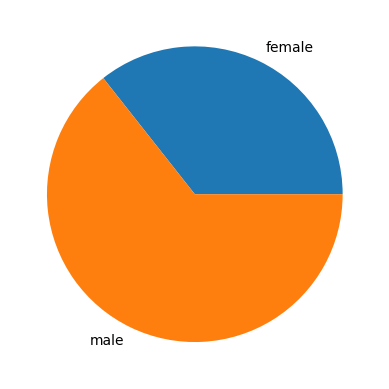

In [ ]:
%matplotlib inline
#'inline' para que nos lo ponga en el mismo notebook

df.groupby("sex", observed=False).size().plot.pie()
# todo pasa por el método 'plot'
# 'plot' es hazme una gráfica y 'pie' es el tipo

<Axes: xlabel='sex'>

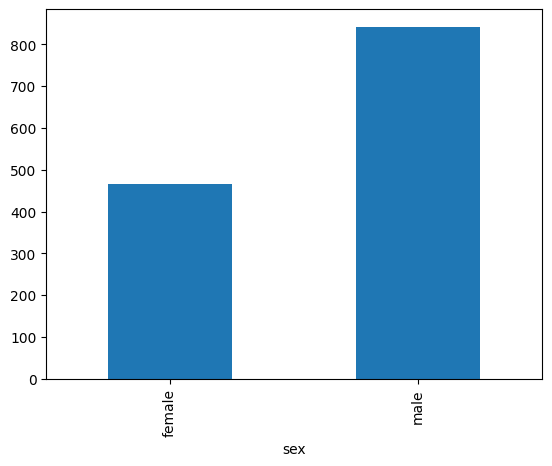

In [60]:
df.groupby("sex", observed=False).size().plot.bar()


Fíjese sobre qué tipo de información se ejecuta `plot`.

In [ ]:
# sobre lo que se me ejecuta plot es una serie. Recibe la info de la serie

In [61]:
type(df.groupby("sex", observed=False).size())

pandas.core.series.Series

<Axes: title={'center': 'Mi primera tarta'}>

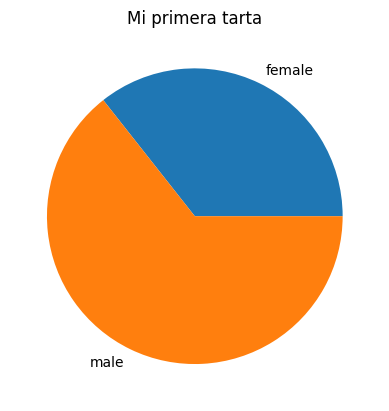

In [62]:
df.groupby('sex', observed=False).size().plot(kind='pie', title='Mi primera tarta', grid=True)

<Axes: title={'center': 'Mi primera tarta'}, xlabel='sex'>

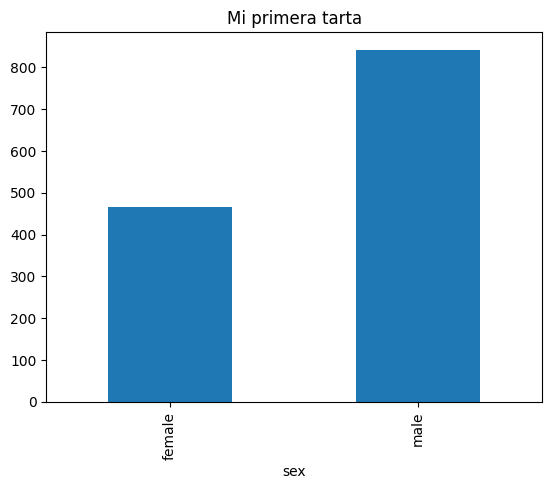

In [63]:
df.groupby('sex', observed=False).size().plot(kind='bar', title='Mi primera tarta', grid=False)

<Axes: title={'center': 'Otra tarta'}>

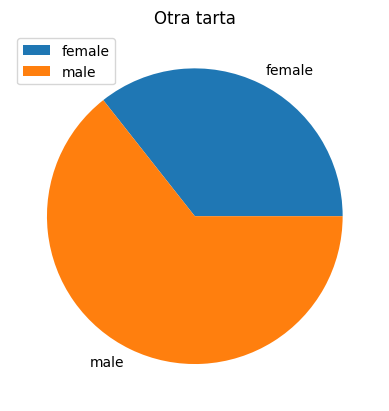

In [64]:
df.groupby('sex', observed=False).size().plot.pie(title='Otra tarta', xlabel='Sexo', legend=True)

In [65]:
help(pd.plotting)

Help on package pandas.plotting in pandas:

NAME
    pandas.plotting - Plotting public API.

DESCRIPTION
    Authors of third-party plotting backends should implement a module with a
    public ``plot(data, kind, **kwargs)``. The parameter `data` will contain
    the data structure and can be a `Series` or a `DataFrame`. For example,
    for ``df.plot()`` the parameter `data` will contain the DataFrame `df`.
    In some cases, the data structure is transformed before being sent to
    the backend (see PlotAccessor.__call__ in pandas/plotting/_core.py for
    the exact transformations).

    The parameter `kind` will be one of:

    - line
    - bar
    - barh
    - box
    - hist
    - kde
    - area
    - pie
    - scatter
    - hexbin

    See the pandas API reference for documentation on each kind of plot.

    Any other keyword argument is currently assumed to be backend specific,
    but some parameters may be unified and added to the signature in the
    future (e.g. `title` whic

In [66]:
help(pd.DataFrame.plot)

Help on class PlotAccessor in module pandas.plotting._core:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data: 'Series | DataFrame') -> 'None'
 |
 |  Make plots of Series or DataFrame.
 |
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' :

In [ ]:
df.groupby("sex", observed=False).size().plot(kind="bar")

In [ ]:
df.groupby("sex", observed=False).size().plot(kind="pie")

Hecha esta pequeña introducción a cómo visualizar información de forma gráfica, volvamos a las agrupaciones.

Supongamos que ahora se quiere conocer el número de mujeres y hombres que viajaban por clase. 

Basta con indicar la lista de columnas en el parámetro pasado a `groupby`.

In [67]:
df.groupby(["pclass", "sex"], observed=False).size()

pclass  sex   
1       female    144
        male      179
2       female    106
        male      171
3       female    216
        male      492
dtype: int64

<Axes: xlabel='pclass,sex'>

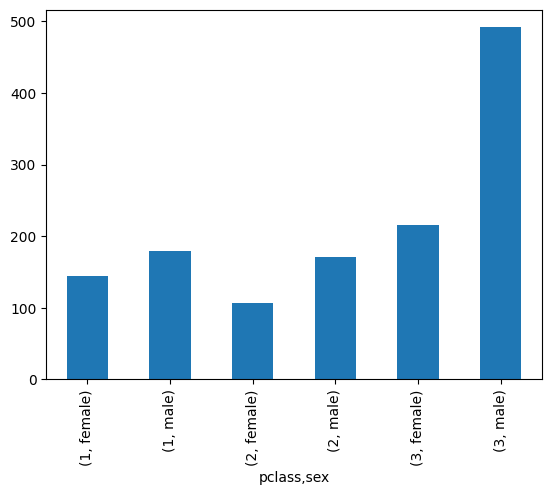

In [68]:
df.groupby(["pclass", "sex"], observed=False).size().plot(kind="bar")

In [69]:
df.groupby(["pclass", "sex"]).size().unstack(1)

C:\Users\elena\AppData\Local\Temp\ipykernel_18688\157236451.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["pclass", "sex"]).size().unstack(1)


sex,female,male
pclass,,
1,144,179
2,106,171
3,216,492


<Axes: xlabel='pclass'>

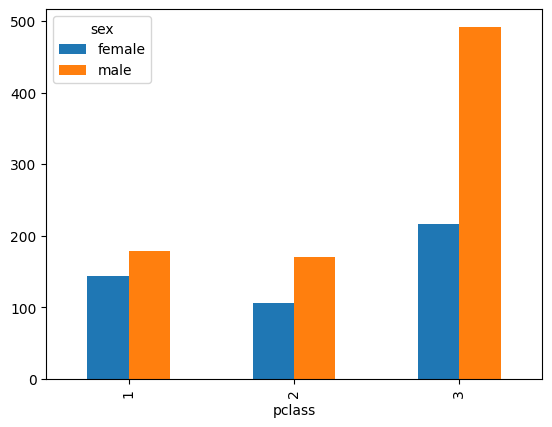

In [77]:
df.groupby(["pclass", "sex"], observed=False).size().unstack(1).plot(kind="bar")

In [71]:
help(pd.DataFrame.unstack)

Help on function unstack in module pandas.core.frame:

unstack(self, level: 'IndexLabel' = -1, fill_value=None, sort: 'bool' = True)
    Pivot a level of the (necessarily hierarchical) index labels.

    Returns a DataFrame having a new level of column labels whose inner-most level
    consists of the pivoted index labels.

    If the index is not a MultiIndex, the output will be a Series
    (the analogue of stack when the columns are not a MultiIndex).

    Parameters
    ----------
    level : int, str, or list of these, default -1 (last level)
        Level(s) of index to unstack, can pass level name.
    fill_value : int, str or dict
        Replace NaN with this value if the unstack produces missing values.
    sort : bool, default True
        Sort the level(s) in the resulting MultiIndex columns.

    Returns
    -------
    Series or DataFrame

    See Also
    --------
    DataFrame.pivot : Pivot a table based on column values.
    DataFrame.stack : Pivot a level of the colum

<Axes: xlabel='pclass'>

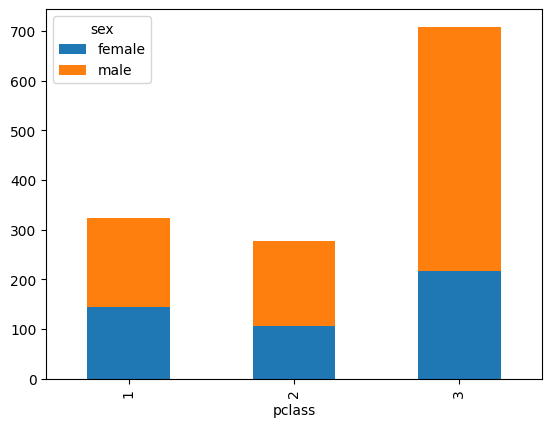

In [76]:
df.groupby(["pclass", "sex"], observed=False).size().unstack(1).plot(kind="bar", stacked=True)

## Agregación de datos (`aggregate`)

Además de los métodos como `describe`, `size`, etc. que realizan algunas operaciones de conteo y estadística descriptiva, se pueden aplicar agregaciones de datos más complejas mediante los métodos `agg` (alias de `aggregate`), el cual recibe como parámetro la función (o funciones) a aplicar sobre el conjunto de datos.

In [73]:
help(df.agg)

Help on method aggregate in module pandas.core.frame:

aggregate(func=None, axis: 'Axis' = 0, *args, **kwargs) method of pandas.core.frame.DataFrame instance
    Aggregate using one or more operations over the specified axis.

    Parameters
    ----------
    func : function, str, list or dict
        Function to use for aggregating the data. If a function, must either
        work when passed a DataFrame or when passed to DataFrame.apply.

        Accepted combinations are:

        - function
        - string function name
        - list of functions and/or function names, e.g. ``[np.sum, 'mean']``
        - dict of axis labels -> functions, function names or list of such.
    axis : {0 or 'index', 1 or 'columns'}, default 0
            If 0 or 'index': apply function to each column.
            If 1 or 'columns': apply function to each row.
    *args
        Positional arguments to pass to `func`.
    **kwargs
        Keyword arguments to pass to `func`.

    Returns
    -------
  

In [74]:
df.loc[:,["fare", "age"]].agg(["mean", "min", "max"])

,fare,age
mean,33.295479,29.341462
min,0.000000,0.166700
max,512.329200,80.000000


También pueden aplicarse sobre agrupaciones.

In [75]:
df.loc[:,["pclass", "sex", "age", "fare"]].groupby(["pclass", "sex"], observed=False).agg(["mean", "min", "max"])

age                      fare                 
                    mean     min   max        mean    min       max
pclass sex                                                         
1      female  37.037594  2.0000  76.0  109.412385  25.70  512.3292
       male    41.029250  0.9167  80.0   69.888385   0.00  512.3292
2      female  27.499191  0.9167  60.0   23.234827  10.50   65.0000
       male    30.815401  0.6667  70.0   19.904946   0.00   73.5000
3      female  22.185307  0.1667  63.0   15.324250   6.75   69.5500
       male    25.863027  0.3333  74.0   12.415462   0.00   69.5500

La lista de funciones que recibe por parámetro puede ser cualquier función, como por ejemplo, las implementadas en NumPy
o funciones lambda que nosotros definamos.

In [ ]:
import numpy as np 

df.loc[:,["pclass", "sex", "age"]].groupby(["pclass", "sex"], observed=False).agg([np.mean, np.std, np.min, np.max])

Este mensaje de `FutureWarning` significa que estamos utilizando .mean(), .std(), .min(), o .max() en un objeto SeriesGroupBy de Pandas de una manera que se modificará
en futuras versiones de la biblioteca.

La advertencia informa que en el futuro deberá pasar una función directamente a la lógica/código.

In [78]:
df.loc[:,["pclass", "sex", "age"]].groupby(["pclass", "sex"], observed=False).agg([lambda x: x.mean(), lambda x: x.std(), lambda x: x.min(), lambda x: x.max()])

age                                 
              <lambda_0> <lambda_1> <lambda_2> <lambda_3>
pclass sex                                               
1      female  37.037594  13.712536     2.0000       76.0
       male    41.029250  13.382928     0.9167       80.0
2      female  27.499191  12.726022     0.9167       60.0
       male    30.815401  13.432300     0.6667       70.0
3      female  22.185307  10.228630     0.1667       63.0
       male    25.863027   9.710492     0.3333       74.0

¿Cuándo usar una agregación o un método predefinido?
Depende de la complejidad de la función a aplicar y de la disponibilidad de método o función predefinidos.

Por ejemplo, ¿cómo contaríamos el número de supervivientes por clase?

In [79]:
df.loc[:,["pclass", "survived"]].groupby(["pclass", "survived"], observed=False).size()

pclass  survived     
1       No sobrevivió    123
        Sobrevivió       200
2       No sobrevivió    158
        Sobrevivió       119
3       No sobrevivió    527
        Sobrevivió       181
dtype: int64

... o empleando un agregado empleando

In [80]:
df.loc[:,["pclass", "survived"]].groupby(["pclass", "survived"], observed=False).agg("size")

pclass  survived     
1       No sobrevivió    123
        Sobrevivió       200
2       No sobrevivió    158
        Sobrevivió       119
3       No sobrevivió    527
        Sobrevivió       181
dtype: int64

In [81]:
type(df.loc[:,["pclass", "survived"]].groupby(["pclass", "survived"], observed=False).agg("size"))

pandas.core.series.Series

__Ejercicio__ Por cada clase, calcule la media de edad de los pasajeros que sobrevivieron y los que no.

In [82]:
df.loc[:,['pclass', 'age', 'survived']].groupby(['pclass','survived'], observed=False).agg('mean')

age
pclass survived                
1      No sobrevivió  42.886870
       Sobrevivió     37.012821
2      No sobrevivió  32.968156
       Sobrevivió     25.003186
3      No sobrevivió  25.666243
       Sobrevivió     22.047103

## Más sobre gráficas y estadística descriptiva

Recordemos cómo obtener la media de la edad por clase y sexo:

In [ ]:
df.loc[:,["pclass", "sex", "age"]].groupby(["pclass", "sex"], observed=False).mean()

Podría obtenerse toda la estadística descriptiva.

In [ ]:
df.loc[:,["pclass", "sex", "age"]].groupby(["pclass", "sex"], observed=False).describe()

Aprovechemos aquí para introducir otro tipo de gráfico: un boxplot, que representa la distribución de una variable numérica mostrando sus cuartiles y posibles valores atípicos.

Usémoslo para representar la media de edad por clase.

In [ ]:
df.loc[:,["pclass", "age"]].boxplot("age", "pclass")

In [ ]:
help(pd.DataFrame.boxplot)

Otro tipo de gráfico que puede ser útil es el histograma. Este representa la distribución de una variable numérica dividiendo su rango en intervalos (o "bins") y 
mostrando la frecuencia de los valores que caen dentro de cada intervalo.

Veamos un ejemplo utilizando la variable "age" del conjunto de datos Titanic:

C:\Users\elena\AppData\Local\Temp\ipykernel_18688\51993245.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.loc[:,["pclass", "age"]].groupby("pclass")["age"].plot(kind="hist", alpha=0.5)


pclass
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
Name: age, dtype: object

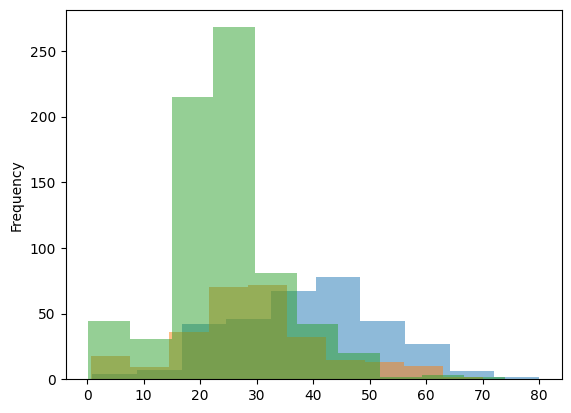

In [83]:
df.loc[:,["pclass", "age"]].groupby("pclass")["age"].plot(kind="hist", alpha=0.5)

# alpha es para poder verlo solapado

A pesar del alpha, sigue parece algo incómodo ver la información. Veámoslo mejor para cada grupo de datos concreto.

In [ ]:
df.loc[:,"age"].hist(by=df["pclass"])

In [ ]:
help(pd.Series.hist)